# Generates new Pubnames of real Pubs by Markov Chains

In [1]:
# Import
import matplotlib.pyplot as plt
from nltk import bigrams
import pandas as pd
import random

In [2]:
df = pd.read_csv('every-pub-in-england/open_pubs.csv')

In [3]:
def getMarkovDict():
    # Generate a dictionary for each word with its frequency
    words = {}
    for name in df['name']:
        for word_1, word_2 in bigrams(name.split(' ')):
            if word_1 in words.keys():
                if word_2 in words[word_1].keys():
                    words[word_1][word_2] += 1
                else:
                    words[word_1][word_2] = 1
            else:
                words[word_1] = {word_2:1}
    return words

In [4]:
def getNewName(words_in_name=None):
    # Generate a new pubname with the dictionary
    word = random.choice(list(words.keys()))
    name = word
    while True:
        if word in words.keys() and len(name.split(' '))<100:
            liste = []
            for w, i in words[word].items():
                liste.extend([w]*i)
            word = random.choice(liste)
            name += ' '+word
        else:
            if len(name.split(' '))==words_in_name or words_in_name==None:
                break
            else:
                word = random.choice(list(words.keys()))
                name = word
    return name

In [5]:
words = getMarkovDict()

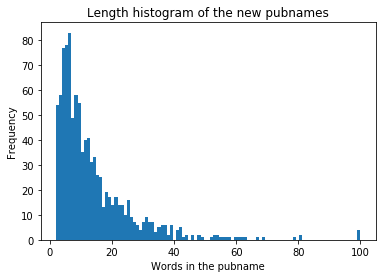

In [6]:
# Generate 1000 names and store their length
lengths = [len(getNewName().split(' ')) for _ in range(1000)]

plt.hist(lengths, bins=max(lengths)-min(lengths)+1)
plt.title('Length histogram of the new pubnames')
plt.xlabel('Words in the pubname')
plt.ylabel('Frequency')
plt.show()

Most new pubs have 3-4 words in their name. Since there is no exit condition in the Markovdictionary loops with infinitly long names are possible.

In [7]:
# Generate new names and have a look at the most probale ones
names = [getNewName() for _ in range(50000)]

In [8]:
df = pd.DataFrame(names, columns=['Name'])
df['Name'].value_counts()[:10]

Frying Pan                     12
FORM REQ'D                     10
Bonded Warehouse 54 Winebar     9
Firefly Inc                     9
Bostin Fittle                   9
spirits co                      9
Lincs Council)                  9
(Hussey Arms)                   8
Jumping Java                    8
Tapsters Promise                8
Name: Name, dtype: int64